In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, RobustScaler


In [ ]:
df = pd.read_csv('PROTECT_and_RISK_shared_DEGs_NOT NORM.csv', index_col=0)

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,Diagnosis,AAMDC,ABAT,ABCA12,ABCB1,ABCC1,ABCG2,ABLIM2,AC013461.1,AC234582.1,...,ZNF575,ZNF57,ZNF613,ZNF69,ZNF703,ZNF704,ZNF844,ZNF91,ZNRF3,ZSWIM5
GSM3316748,Control,25.9348,5.5414,0.039268,36.8688,5.8691,22.0679,5.1852,4.7936,100.4090,...,5.1506,6.7886,5.3642,7.1065,38.7633,4.5095,3.7331,20.2813,3.3339,3.6266
GSM3316749,Control,11.6939,3.7807,0.289900,18.9955,9.7232,4.9927,1.7404,6.8132,188.9640,...,8.1902,6.2496,7.4671,3.8288,20.2415,4.0327,2.4122,13.5649,2.5927,2.2582
GSM3316750,Control,28.4807,5.9662,0.010000,38.3700,6.2720,45.4189,2.4148,2.6355,92.5353,...,9.1893,10.8217,3.3373,4.9504,32.2447,2.9052,2.7927,17.5972,2.0049,3.2104
GSM3316751,Control,35.8430,4.2965,0.010081,35.1791,4.7454,14.0527,5.9738,2.0259,185.8320,...,8.3106,6.6119,5.7008,5.3747,34.0843,3.3492,3.1923,13.9003,1.7972,2.8750
GSM3316752,Control,30.4372,5.7828,0.010000,81.8202,11.7178,26.8624,4.3558,6.7774,114.3290,...,4.6946,7.6748,4.5044,6.7213,33.9893,4.0935,5.3238,22.7351,2.9283,2.4813


# *EDA*

## Raw data

In [ ]:
df1.describe()

,AAMDC,ABAT,ABCA12,ABCB1,ABCC1,ABCG2,ABLIM2,AC013461.1,AC234582.1,ACAA1,...,ZNF575,ZNF57,ZNF613,ZNF69,ZNF703,ZNF704,ZNF844,ZNF91,ZNRF3,ZSWIM5
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,18.481036,3.686130,1.460926,14.131209,9.399889,8.487860,3.219015,6.710549,679.945166,59.192552,...,3.234691,4.813666,3.258993,5.111352,17.712241,3.080993,2.442990,12.589191,1.543881,2.148078
std,10.509028,1.930181,1.611165,15.173998,4.423135,13.000225,1.702311,2.804100,512.190495,23.807293,...,1.966933,2.081730,1.611000,2.204151,7.665073,1.817260,1.169766,5.566262,0.698195,1.062918
min,5.340900,0.767070,0.010000,0.846780,1.275200,0.200300,0.676770,0.763870,4.060500,21.118300,...,0.706300,1.069800,0.785520,0.805130,2.792200,0.232310,0.519280,3.370200,0.275470,0.232790
25%,12.271325,2.435200,0.109912,4.014650,5.760975,1.082050,2.153400,4.659975,256.253750,42.909825,...,1.806400,3.256200,2.174800,3.580975,12.601525,1.754975,1.671225,8.815900,1.057325,1.369375
50%,15.192550,3.199000,0.967935,7.028650,9.534050,2.640650,2.712100,6.763500,583.526450,51.182550,...,2.613200,4.473300,2.785950,4.838800,15.894100,2.694550,2.268950,11.618300,1.429150,2.046850
75%,21.108275,4.220400,2.244250,18.696525,12.588700,9.167875,3.765825,8.547925,978.399725,68.982350,...,4.194175,6.090225,3.654175,6.491975,20.970450,3.957400,2.897425,15.136850,1.916275,2.697650
max,84.242900,12.412200,8.625800,81.820200,24.768600,67.012800,10.775600,15.801700,2713.060300,151.812400,...,10.794800,11.163100,9.408800,13.347500,51.124500,10.661700,7.409700,40.195800,4.058200,6.115900


In [ ]:
df1.Diagnosis.unique()

array(['Control', 'UC'], dtype=object)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, GSM3316748 to GSM2933032
Columns: 1883 entries, Diagnosis to ZSWIM5
dtypes: float64(1882), object(1)
memory usage: 4.7+ MB


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

df = df1
fea = df1.columns.to_list()
fea.remove('Diagnosis')
X = df[fea]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['Diagnosis'])
fig.show()

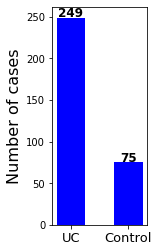

In [ ]:
fig = plt.figure(figsize=(1.7, 4))
ax = fig.gca()


y = df1['Diagnosis'].value_counts()
x= y.index

ax.bar( height= y, width=0.5,
       align='center', color='blue',
       x= x)
plt.xticks(rotation=0,fontsize = 13)
#ax.set_title('')
#ax.set_xlabel('', size = 14)
ax.set_ylabel('Number of cases', size = 16)

#def addlabels(x,y):
for i in range(len(x)):
    plt.text(i, y[i]+1, y[i], ha = 'center', color='black', fontweight='bold', size = 12)
#plt.text(x= lables ,y = valuess,  f'    {valuess}')

plt.savefig("Diagnosis bar plot nums", bbox_inches='tight', transparent = True)

plt.show()

Data before normalization

In [ ]:
#melt so that all gene values will be in one column
risk_protectT = df1.groupby('Diagnosis').mean().T
risk_protectT

Diagnosis,Control,UC
AAMDC,30.749472,14.785724
ABAT,5.600679,3.109459
ABCA12,0.046757,1.886880
ABCB1,35.216072,7.780347
ABCC1,4.780085,10.791396
...,...,...
ZNF704,4.453198,2.667678
ZNF844,3.527839,2.116228
ZNF91,18.258143,10.881676
ZNRF3,2.210680,1.343039


In [ ]:
risk_protectT.sort_values(by=['UC'], ascending=False).tail(10)

Diagnosis,Control,UC
TEX11,1.550377,0.630302
PROC,2.191048,0.626511
DPP10,3.149777,0.618004
LCN15,4.869891,0.617594
NPY,3.526955,0.607771
MUC5AC,0.056158,0.602704
RPL10L,1.903560,0.587643
BMP3,5.059509,0.556506
GLRA2,2.773821,0.513052
PLA2G12B,3.410828,0.512296


In [ ]:
#Generation UP or Down labels for 'UC' group genes
risk_protectTup_all = risk_protectT.copy()
columnss = ['Control', 'UC']

for row_uc,row_crl in zip(risk_protectTup_all['UC'],risk_protectTup_all['Control']):
#for row_uc, row_crl in zip(risk_protectTup[i],risk_protectTup[j]):
    if row_uc >row_crl :
      risk_protectTup_all['UC'].replace(to_replace = row_uc, value = 'UP',  inplace = True)    
    if row_uc  <  row_crl:
      risk_protectTup_all['UC'].replace(to_replace = row_uc, value = 'Down',  inplace = True)
    if row_uc  ==  row_crl:
      risk_protectTup_all['UC'].replace(to_replace = row_uc, value = 'equal',  inplace = True)

risk_protectTup_all

Diagnosis,Control,UC
AAMDC,30.749472,Down
ABAT,5.600679,Down
ABCA12,0.046757,UP
ABCB1,35.216072,Down
ABCC1,4.780085,UP
...,...,...
ZNF704,4.453198,Down
ZNF844,3.527839,Down
ZNF91,18.258143,Down
ZNRF3,2.210680,Down


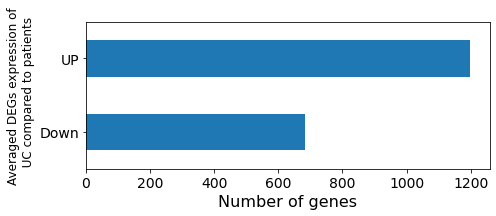

In [ ]:
#Number of up or down-regulated genes in uc patients compared to controls 

ax = risk_protectTup_all['UC'].value_counts().sort_index().plot(kind='barh', fontsize = 14, rot = 0, figsize = (7, 3))
ax.set_xlabel('Number of genes',fontsize = 16)
ax.set_ylabel("Averaged DEGs expression of\n  UC compared to patients", fontsize = 12)
plt.tight_layout()
plt.savefig(" all DEGs expression bar plot.pdf", tight = True)
plt.show()

Calculating the number of genes which expression was at least x2 greater ar smaller in UC patients compared to controls

In [ ]:
#Generation UP or Down labels for 'UC' group genes
#which expression was timesX2 larger or smaller compared to comtrols

risk_protectTup = risk_protectT.copy()
columnss = ['Control', 'UC']

for row_uc,row_crl in zip(risk_protectTup['UC'],risk_protectTup['Control']):
#for row_uc, row_crl in zip(risk_protectTup[i],risk_protectTup[j]):
    if (row_uc/ 2 ) >= row_crl :
      risk_protectTup['UC'].replace(to_replace = row_uc, value = 'UP',  inplace = True)    
    if row_uc  <=  (row_crl/2):
      risk_protectTup['UC'].replace(to_replace = row_uc, value = 'Down',  inplace = True)

risk_protectTup

Diagnosis,Control,UC
AAMDC,30.749472,Down
ABAT,5.600679,3.109459
ABCA12,0.046757,UP
ABCB1,35.216072,Down
ABCC1,4.780085,UP
...,...,...
ZNF704,4.453198,2.667678
ZNF844,3.527839,2.116228
ZNF91,18.258143,10.881676
ZNRF3,2.210680,1.343039


In [ ]:
list_up_down = risk_protectTup[risk_protectTup['UC'] == 'UP']
list_up_down
list_down = risk_protectTup[risk_protectTup['UC'] == 'Down']
list_down
list_up_down = list_up_down.append(list_down,  ignore_index = True)
list_up_down


Diagnosis,Control,UC
0,0.046757,UP
1,4.780085,UP
2,234.856481,UP
3,0.378779,UP
4,0.494051,UP
...,...,...
1140,6.155443,Down
1141,14.071693,Down
1142,362.904925,Down
1143,5.702553,Down


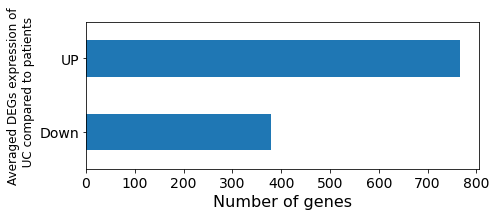

In [ ]:
#Number of up or down-regulated genes in uc patients compared to controls (times 2)

ax = list_up_down['UC'].value_counts().sort_index().plot(kind='barh', fontsize = 14, rot = 0, figsize = (7, 3))
ax.set_xlabel('Number of genes',fontsize = 16)
ax.set_ylabel("Averaged DEGs expression of\n  UC compared to patients", fontsize = 12)
plt.tight_layout()
plt.savefig("DEGs expression bar plot.pdf", tight = True)
plt.show()

Distribution of gene read counts of averaged and of raw data

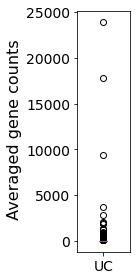

In [ ]:
# Average values distribution for 'UC' group

ax = risk_protectT['UC'].plot(kind= 'box', fontsize = 14, figsize = (2,4))
  #ax.set_xlabel(i,fontsize = 18)
ax.set_ylabel(" Averaged gene counts", fontsize = 16)
plt.tight_layout()
plt.savefig("Averaged gene counts box plot.pdf")
plt.show()

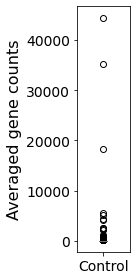

In [ ]:
# Averaged values distribution for 'Control' group

ax = risk_protectT['Control'].plot(kind= 'box', fontsize = 14, figsize = (2,4))
  #ax.set_xlabel(i,fontsize = 18)
ax.set_ylabel("Averaged gene counts", fontsize = 16)
plt.tight_layout()
plt.savefig("Control Averaged gene counts box plot.pdf")
plt.show()

In [ ]:
risk_protectb = df1.copy()
risk_protectb.index= df1['Diagnosis']
risk_protectb.drop('Diagnosis', axis =1, inplace = True)
risk_protectb

,AAMDC,ABAT,ABCA12,ABCB1,ABCC1,ABCG2,ABLIM2,AC013461.1,AC234582.1,ACAA1,...,ZNF575,ZNF57,ZNF613,ZNF69,ZNF703,ZNF704,ZNF844,ZNF91,ZNRF3,ZSWIM5
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Control,25.9348,5.5414,0.039268,36.8688,5.8691,22.06790,5.1852,4.7936,100.4090,91.4398,...,5.1506,6.7886,5.3642,7.1065,38.7633,4.5095,3.7331,20.2813,3.3339,3.6266
Control,11.6939,3.7807,0.289900,18.9955,9.7232,4.99270,1.7404,6.8132,188.9640,78.0687,...,8.1902,6.2496,7.4671,3.8288,20.2415,4.0327,2.4122,13.5649,2.5927,2.2582
Control,28.4807,5.9662,0.010000,38.3700,6.2720,45.41890,2.4148,2.6355,92.5353,122.6918,...,9.1893,10.8217,3.3373,4.9504,32.2447,2.9052,2.7927,17.5972,2.0049,3.2104
Control,35.8430,4.2965,0.010081,35.1791,4.7454,14.05270,5.9738,2.0259,185.8320,103.2063,...,8.3106,6.6119,5.7008,5.3747,34.0843,3.3492,3.1923,13.9003,1.7972,2.8750
Control,30.4372,5.7828,0.010000,81.8202,11.7178,26.86240,4.3558,6.7774,114.3290,90.3699,...,4.6946,7.6748,4.5044,6.7213,33.9893,4.0935,5.3238,22.7351,2.9283,2.4813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UC,12.8054,3.7931,1.888200,6.3028,11.7091,4.04060,3.5402,5.9971,1413.5002,50.9337,...,2.0813,5.5269,2.0588,3.9306,17.1931,2.4215,2.2324,11.1981,1.8088,2.2810
UC,28.8522,9.6467,0.096501,32.5630,8.8842,7.08840,6.1987,9.1743,481.1641,54.8253,...,5.7451,7.2663,4.0780,8.8495,41.5702,10.6617,3.0825,19.4314,3.1041,4.7714
UC,12.1806,3.1919,6.167000,4.6280,15.0349,0.78703,2.4768,8.8643,2040.0902,45.0833,...,1.8492,3.4353,2.3714,5.1901,16.3660,3.6026,2.0107,12.9733,1.5402,2.6954


In [ ]:
nprisk = risk_protectb.copy()
nprisk2 = nprisk.stack().reset_index()
nprisk2

,Diagnosis,level_1,0
0,Control,AAMDC,25.934800
1,Control,ABAT,5.541400
2,Control,ABCA12,0.039268
3,Control,ABCB1,36.868800
4,Control,ABCC1,5.869100
...,...,...,...
609763,UC,ZNF704,3.676700
609764,UC,ZNF844,1.784600
609765,UC,ZNF91,12.979300
609766,UC,ZNRF3,2.043500


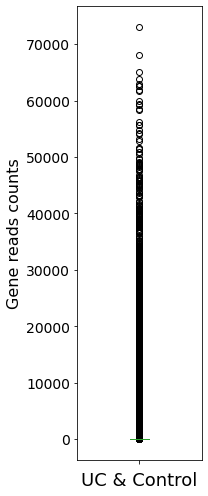

In [ ]:

ax = nprisk2.iloc[:,2].plot(kind = 'box', fontsize = 14, figsize = (3,7))
ax.set_xlabel('UC & Control',fontsize = 18)
labe = ''
ax.set_xticklabels(labe)
ax.set_ylabel("Gene reads counts", fontsize = 16)
plt.tight_layout()
plt.savefig("Gene counts for both UC and control groups.pdf")
plt.show()

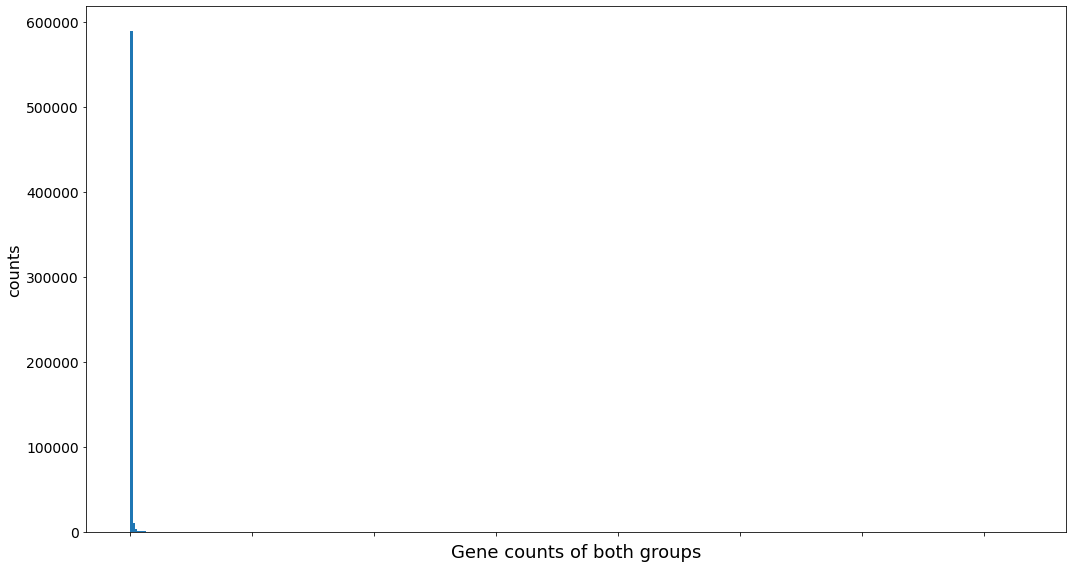

In [ ]:
ax = nprisk2.iloc[:,2].plot(kind = 'hist', fontsize = 14, bins= 400, figsize = (15,8))
ax.set_xlabel('Gene counts of both groups',fontsize = 18)
labe = ''
ax.set_xticklabels(labe)
ax.set_ylabel("counts", fontsize = 16)
plt.tight_layout()
plt.savefig("gene counts of both groups hist.pdf")
plt.show()

In [ ]:
#Max values for all genes and both groups

risk_protectb.max().sort_values().tail(70)

DEFA6       820.4459
CXCL8       821.0829
MS4A12      822.1513
IL1B        832.6782
REG1B       833.0768
             ...    
FTH1      10257.0990
FABP1     12804.5610
MT-ND3    29355.1050
MT-CO3    58526.2340
MT-CO1    73040.0800
Length: 70, dtype: float64

In [ ]:
#Min values for all genes and both groups

risk_protectb.min().sort_values().head(70)

CEACAM4      0.01
C4BPA        0.01
SAA2-SAA4    0.01
SAA2         0.01
SAA4         0.01
             ... 
DEFB4B       0.01
SIGLEC5      0.01
BHLHA15      0.01
BEX1         0.01
KCNJ10       0.01
Length: 70, dtype: float64

## Outlier removal and normalization

In [ ]:
risk_protectb_scaled = risk_protectb.copy()

In [ ]:
#Scaling using RobustScaler which handles outliers 
robustscaler = RobustScaler(quantile_range = (1, 99))
robustscaler.fit(risk_protectb_scaled)
                                    
risk_protectb_scaled = robustscaler.transform(risk_protectb_scaled)

In [ ]:
risk_protectb_scaled

array([[ 1.80503086e-01,  2.50924935e-01, -1.36806700e-01, ...,
         3.37583477e-01,  5.85813235e-01,  3.28903037e-01],
       [-5.87881609e-02,  6.23134540e-02, -9.98848143e-02, ...,
         7.58559386e-02,  3.57854306e-01,  4.40029479e-02],
       [ 2.23282094e-01,  2.96430789e-01, -1.41118319e-01, ...,
         2.32988324e-01,  1.77074141e-01,  2.42250438e-01],
       ...,
       [-5.06100928e-02, -7.60573360e-04,  7.65900937e-01, ...,
         5.28022176e-02,  3.41538573e-02,  1.35027735e-01],
       [-5.52830345e-02, -4.13280566e-02, -1.22920481e-01, ...,
        -3.58509522e-03,  8.72991662e-02,  7.68359967e-02],
       [-5.91611897e-02, -3.67646165e-02, -4.89550275e-02, ...,
         5.30360281e-02,  1.88945720e-01,  9.26383328e-02]])

In [ ]:
risk_protectb_scaled = pd.DataFrame(risk_protectb_scaled, columns = risk_protectb.columns, index = risk_protectb.index) 

In [ ]:
risk_protectb_scaled

,AAMDC,ABAT,ABCA12,ABCB1,ABCC1,ABCG2,ABLIM2,AC013461.1,AC234582.1,ACAA1,...,ZNF575,ZNF57,ZNF613,ZNF69,ZNF703,ZNF704,ZNF844,ZNF91,ZNRF3,ZSWIM5
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Control,0.180503,0.250925,-0.136807,0.474564,-0.204511,0.332567,0.305971,-0.160074,-0.233550,0.397639,...,0.296461,0.259896,0.339515,0.206787,0.635844,0.225951,0.272486,0.337583,0.585813,0.328903
Control,-0.058788,0.062313,-0.099885,0.190315,0.010555,0.040264,-0.120219,0.004039,-0.190741,0.265567,...,0.651598,0.199392,0.616435,-0.092100,0.120873,0.166592,0.026660,0.075856,0.357854,0.044003
Control,0.223282,0.296431,-0.141118,0.498438,-0.182028,0.732303,-0.036782,-0.335440,-0.237357,0.706329,...,0.768330,0.712617,0.072604,0.010177,0.454604,0.026225,0.097472,0.232988,0.177074,0.242250
Control,0.346992,0.117568,-0.141106,0.447692,-0.267215,0.195358,0.403537,-0.384976,-0.192255,0.513862,...,0.665665,0.240061,0.383840,0.048868,0.505751,0.081500,0.171840,0.088926,0.113195,0.172420
Control,0.256157,0.276784,-0.141118,1.189450,0.121857,0.414642,0.203358,0.001130,-0.226821,0.387071,...,0.243184,0.359373,0.226293,0.171661,0.503110,0.174161,0.568523,0.433204,0.461069,0.090452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UC,-0.040112,0.063642,0.135569,-0.011544,0.121372,0.023965,0.102452,-0.062277,0.401229,-0.002458,...,-0.062145,0.118268,-0.095754,-0.082817,0.036117,-0.033993,-0.006802,-0.016375,0.116763,0.048750
UC,0.229524,0.690697,-0.128375,0.406087,-0.036263,0.076139,0.431361,0.195901,-0.049484,0.035981,...,0.365921,0.313518,0.170143,0.365727,0.713886,0.991864,0.151406,0.304464,0.515137,0.567250
UC,-0.050610,-0.000761,0.765901,-0.038179,0.306957,-0.031731,-0.029111,0.170711,0.704137,-0.060245,...,-0.089263,-0.116517,-0.054590,0.032034,0.013120,0.113047,-0.048062,0.052802,0.034154,0.135028


In [ ]:
risk_protectb_scaled.describe()

,AAMDC,ABAT,ABCA12,ABCB1,ABCC1,ABCG2,ABLIM2,AC013461.1,AC234582.1,ACAA1,...,ZNF575,ZNF57,ZNF613,ZNF69,ZNF703,ZNF704,ZNF844,ZNF91,ZNRF3,ZSWIM5
count,324.000000,3.240000e+02,324.000000,3.240000e+02,324.000000,324.000000,324.000000,3.240000e+02,3.240000e+02,324.000000,...,324.000000,324.000000,3.240000e+02,324.000000,324.000000,324.000000,3.240000e+02,3.240000e+02,3.240000e+02,324.000000
mean,0.055257,5.218283e-02,0.072625,1.129558e-01,-0.007486,0.100096,0.062715,-4.302763e-03,4.661105e-02,0.079118,...,0.072613,0.038207,6.229236e-02,0.024853,0.050551,0.048110,3.238970e-02,3.783410e-02,3.528610e-02,0.021076
std,0.176584,2.067668e-01,0.237349,2.413203e-01,0.246819,0.222546,0.210610,2.278605e-01,2.476048e-01,0.235155,...,0.229810,0.233677,2.121436e-01,0.200992,0.213116,0.226238,2.176994e-01,2.169085e-01,2.147327e-01,0.221299
min,-0.165538,-2.605157e-01,-0.141118,-9.831361e-02,-0.460859,-0.041775,-0.251811,-4.875286e-01,-2.801273e-01,-0.296958,...,-0.222796,-0.382048,-2.634255e-01,-0.367822,-0.364279,-0.306535,-3.256223e-01,-3.214155e-01,-3.548187e-01,-0.377686
25%,-0.049086,-8.182055e-02,-0.126400,-4.793326e-02,-0.210544,-0.026681,-0.069122,-1.709320e-01,-1.582112e-01,-0.081713,...,-0.094264,-0.136621,-8.047893e-02,-0.114698,-0.091545,-0.116972,-1.112396e-01,-1.092051e-01,-1.143562e-01,-0.141050
50%,0.000000,2.374403e-17,0.000000,-7.047314e-18,0.000000,0.000000,0.000000,-3.599551e-17,-2.753874e-17,0.000000,...,0.000000,0.000000,2.916504e-17,0.000000,0.000000,0.000000,-4.136231e-17,-3.458605e-17,3.413882e-17,0.000000
75%,0.099403,1.094154e-01,0.188021,1.855605e-01,0.170455,0.111737,0.130367,1.450020e-01,1.908909e-01,0.175817,...,0.184716,0.181502,1.143317e-01,0.150750,0.141140,0.157218,1.169623e-01,1.371124e-01,1.498172e-01,0.135496
max,1.160260,9.869457e-01,1.128119,1.189450e+00,0.850115,1.101961,0.997614,7.344421e-01,1.029466e+00,0.993966,...,0.955911,0.750939,8.721261e-01,0.775891,0.979529,0.991864,9.567193e-01,1.113620e+00,8.085745e-01,0.847174


PCA Scatter Plots

In [ ]:
#A visualization of the first two principal components of a PCA, by reducing a dataset of 4 dimensions to 2D.

import plotly.express as px
from sklearn.decomposition import PCA

df = risk_protectb_scaled
fea = risk_protectb_scaled.columns.to_list()
#fea.remove('Diagnosis')
X = df[fea]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df.index)
fig.show()

In [25]:
#We applied PCA the same dataset, and retrieve all the components.
# We use the same px.scatter_matrix trace to display our results, 
#but this time our features are the resulting principal components, ordered by how much variance they are able to explain.

import plotly.express as px
from sklearn.decomposition import PCA


df = risk_protectb_scaled
fea = risk_protectb_scaled.columns.to_list()
#features = df[fea]

pca = PCA()
components = pca.fit_transform(df[fea])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df.index
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

df = risk_protectb_scaled
fea = risk_protectb_scaled.columns.to_list()
X = df[fea]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df.index,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

Distribution of UC and Control relative gene counts

In [ ]:

nprisk3 = risk_protectb_scaled.stack().reset_index()

In [ ]:
nprisk3

,Diagnosis,level_1,0
0,Control,AAMDC,0.180503
1,Control,ABAT,0.250925
2,Control,ABCA12,-0.136807
3,Control,ABCB1,0.474564
4,Control,ABCC1,-0.204511
...,...,...,...
609763,UC,ZNF704,0.122272
609764,UC,ZNF844,-0.090140
609765,UC,ZNF91,0.053036
609766,UC,ZNRF3,0.188946


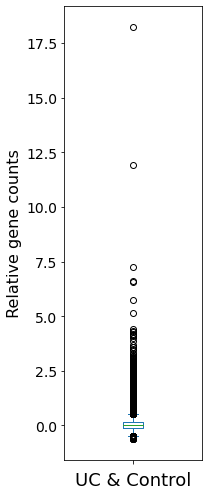

In [ ]:
ax = nprisk3.iloc[:,2].plot(kind = 'box', fontsize = 14, figsize = (3,7))
ax.set_xlabel('UC & Control',fontsize = 18)
labe = ''
ax.set_xticklabels(labe)
ax.set_ylabel(" Relative gene counts ", fontsize = 16)
plt.tight_layout()
plt.savefig("Relative gene counts UC and control.pdf")
plt.show()

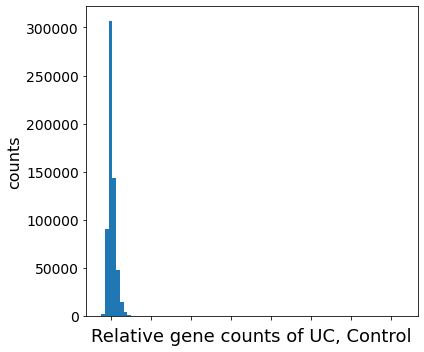

In [ ]:
ax = nprisk3.iloc[:,2].plot(kind = 'hist', fontsize = 14, bins= 80, figsize = (6,5))
ax.set_xlabel('Relative gene counts of UC, Control',fontsize = 18)
labe = ''
ax.set_xticklabels(labe)
ax.set_ylabel("counts", fontsize = 16)
plt.tight_layout()
plt.savefig("Relative gene counts of both groups hist.pdf")
plt.show()

In [ ]:
#Max values for all genes and both groups- after scaling
risk_protectb_scaled.max().sort_values().tail(30)

LAIR2       3.068194
STC1        3.078264
SLC2A3      3.102280
DEFB4A      3.105289
IL22        3.116842
OLR1        3.162224
HAVCR1      3.162330
IL1RN       3.293045
CAPN13      3.302169
SFRP2       3.467238
C2orf82     3.503071
MYBPC1      3.588162
CCL3        3.592507
INHBA       3.687494
ALOX15      3.844823
IL5RA       3.994946
IL1A        4.105360
IL6         4.132988
MMP1        4.151620
LY6E        4.204588
CD300E      4.286365
DEFA6       4.327679
RBP2        4.396133
ITLN2       5.163989
FAM3B       5.730008
CSF2        6.549678
ISG15       6.621779
SPRR1A      7.263685
DPEP1      11.941076
IFI6       18.237481
dtype: float64

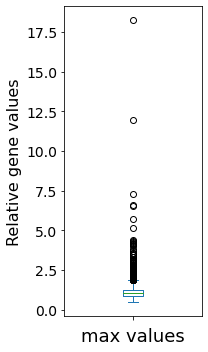

In [ ]:
#Max values distribution for all genes and both groups- after scaling
ax = risk_protectb_scaled.max().sort_values().plot(kind = 'box', fontsize = 14, figsize = (3,5))
ax.set_xlabel('max values',fontsize = 18)
labe = ''
ax.set_xticklabels(labe)
ax.set_ylabel("Relative gene values", fontsize = 16)
plt.tight_layout()
plt.savefig("max Relative gene values box plot.pdf")
plt.show()

In [ ]:
#Min values for all genes and both groups- after scaling
risk_protectb_scaled.min().sort_values().head(30)

EDEM1      -0.626588
CHST12     -0.620320
B9D1       -0.620067
TMEM110    -0.619607
ATP6V1E2   -0.611758
CNN2       -0.593108
FICD       -0.592611
TRAM2      -0.587252
BTN3A3     -0.581802
TTYH3      -0.572778
CD74       -0.566924
PHTF1      -0.564415
HSPA13     -0.558044
ESRP1      -0.557019
FUT8       -0.552959
RASGEF1B   -0.552265
GRK5       -0.550485
TPST2      -0.546985
IFNAR2     -0.546623
DNAJB9     -0.543675
CALU       -0.541110
HLA-DMA    -0.534922
SEC24D     -0.532053
HLA-DRA    -0.531563
ADAP1      -0.530274
BTN3A1     -0.528839
PLEKHF1    -0.527272
SGMS1      -0.526856
ARFGAP3    -0.526560
ADAM9      -0.526373
dtype: float64

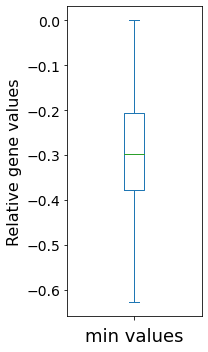

In [ ]:
#Min values distribution for all genes and both groups- after scaling
ax = risk_protectb_scaled.min().sort_values().plot(kind = 'box', fontsize = 14, figsize = (3,5))
ax.set_xlabel('min values',fontsize = 18)
labe = ''
ax.set_xticklabels(labe)
ax.set_ylabel("Relative gene values", fontsize = 16)
plt.tight_layout()
plt.savefig("min Relative gene values box plot.pdf")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


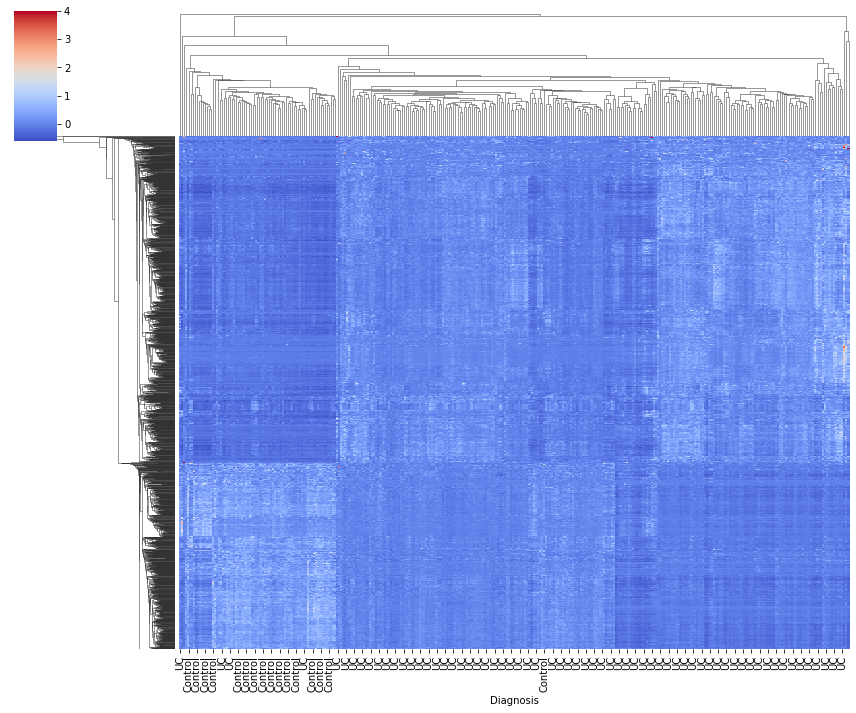

In [ ]:
#Heatmap of relative gene expression.
#We chose the third highest value as the maximun so that it would be easier to see the differences in gene expression
sns.clustermap(risk_protectb_scaled.T, cmap='coolwarm',  figsize=(12, 10),vmin=-0.6, vmax=4,  yticklabels=False, xticklabels=4 )
#plt.tight_layout()
#plt.savefig("HEATMAP DEGs no outliers blue.pdf")
#plt.show()

Distribution of Control group relative gene counts

In [ ]:
only_uc =  nprisk3[nprisk3['Diagnosis'] =='UC']
only_crl =  nprisk3[nprisk3['Diagnosis'] =='Control']

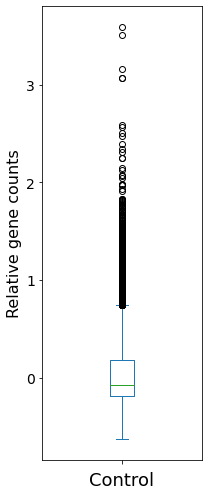

In [ ]:
ax = only_crl.iloc[:,2].plot(kind = 'box', fontsize = 14, figsize = (3,7))
ax.set_xlabel('Control',fontsize = 18)
labe = ''
ax.set_xticklabels(labe)
ax.set_ylabel("Relative gene counts", fontsize = 16)
plt.tight_layout()
plt.savefig("Relative gene counts control.pdf")
plt.show()

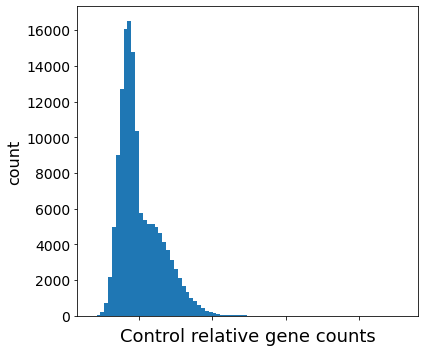

In [ ]:
ax = only_crl.iloc[:,2].plot(kind = 'hist', fontsize = 14, bins= 80, figsize = (6,5))
ax.set_xlabel('Control relative gene counts',fontsize = 18)
labe = ''
ax.set_xticklabels(labe)
ax.set_ylabel("count", fontsize = 16)
plt.tight_layout()
plt.savefig("Control relative gene counts hist.pdf")
plt.show()

Distribution of UC group relative gene counts

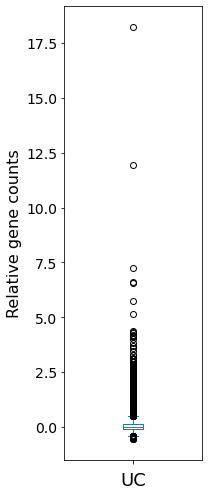

In [ ]:
ax = only_uc.iloc[:,2].plot(kind = 'box', fontsize = 14, figsize = (3,7))
ax.set_xlabel('UC',fontsize = 18)
labe = ''
ax.set_xticklabels(labe)
ax.set_ylabel("Relative gene counts", fontsize = 16)
plt.tight_layout()
plt.savefig("Relative gene counts UC.pdf")
plt.show()

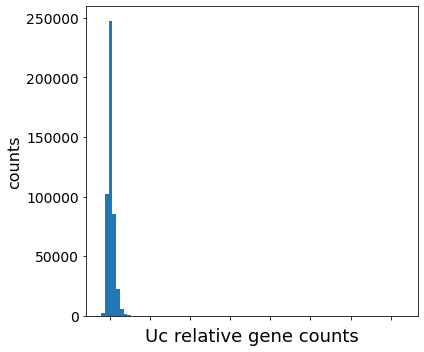

In [ ]:
ax = only_uc.iloc[:,2].plot(kind = 'hist', fontsize = 14, bins= 80, figsize = (6,5))
ax.set_xlabel('Uc relative gene counts',fontsize = 18)
labe = ''
ax.set_xticklabels(labe)
ax.set_ylabel("counts", fontsize = 16)
plt.tight_layout()
plt.savefig("Uc gene counts hist.pdf")
plt.show()

In [ ]:
risk_protectb_avg = risk_protectb_scaled.copy()

Averaged relative gene expression

In [ ]:

risk_protectb_avgT = risk_protectb_avg.groupby('Diagnosis').mean().T
risk_protectb_avgT

Diagnosis,Control,UC
AAMDC,0.261404,-0.006836
ABAT,0.257275,-0.009592
ABCA12,-0.135703,0.135375
ABCB1,0.448280,0.011955
ABCC1,-0.265280,0.070162
...,...,...
ZNF704,0.218942,-0.003345
ZNF844,0.234286,-0.028422
ZNF91,0.258744,-0.028705
ZNRF3,0.240363,-0.026484


In [ ]:
risk_protectb_avgT.min().sort_values()

Diagnosis
Control   -0.354595
UC        -0.076321
dtype: float64

In [ ]:
risk_protectb_avgT.max().sort_values()

Diagnosis
UC         0.165447
Control    0.500778
dtype: float64

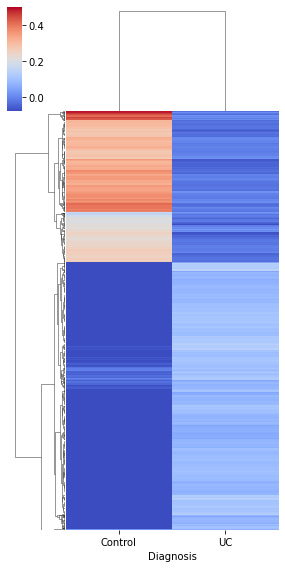

In [ ]:
#Heatmap of avraged relative gene expression
sns.clustermap(risk_protectb_avgT, figsize=(4, 8),vmin=-0.076321, vmax=0.500778, yticklabels=False, xticklabels=1,cmap='coolwarm')
plt.savefig("HEATMAP DEGs no AVRG outliers.pdf")
plt.show()